In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **INICIALIZANDO EL DATASET**

In [14]:
df = pd.read_csv('./data/universal_top_spotify_songs.csv')

#### **DESCRIPCIÓN DE COLUMNAS**

- `spotify_id`: El ID de la canción de spotify
- `name`: El nombre de la cancion  
- `artist`: El nombre del artista
- `daily_rank`: El ranking diario de la canción
- `daily_movement`: El cambio del ranking diario con el día anterior
- `weekly_movement`: El cambio del ranking con la semana anterior
- `country`: El código ISO del país
- `snapshot_date`: Fecha en donde se recogierons los datos desde la API de Spotify
- `popularity`: Medida de popularidad actual de la canción
- `is_explicit`: Indica si la canción tiene contenido de letras explicitas
- `duration_ms`: Duración de la canción en milisegundos
- `album_name`: El título del album de la canción
- `album_release_date`: Fecha de lanzamiento del álbum de la canción
- `danceability`: Medida que indica que tan bailable es la canción

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018853 entries, 0 to 1018852
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   spotify_id          1018853 non-null  object 
 1   name                1018826 non-null  object 
 2   artists             1018826 non-null  object 
 3   daily_rank          1018853 non-null  int64  
 4   daily_movement      1018853 non-null  int64  
 5   weekly_movement     1018853 non-null  int64  
 6   country             1005046 non-null  object 
 7   snapshot_date       1018853 non-null  object 
 8   popularity          1018853 non-null  int64  
 9   is_explicit         1018853 non-null  bool   
 10  duration_ms         1018853 non-null  int64  
 11  album_name          1018334 non-null  object 
 12  album_release_date  1018473 non-null  object 
 13  danceability        1018853 non-null  float64
 14  energy              1018853 non-null  float64
 15  key            

#### **TRANSFORMANDO LA COLUMNA DE FECHA DE OBJECT A DATETIME**


In [30]:
df['date'] = pd.to_datetime(df['snapshot_date'])

#### **GUARDANDO COLUMNA DE FECHAS**

In [31]:
fechas = pd.to_datetime(df['snapshot_date'])
fechas

0         2024-07-26
1         2024-07-26
2         2024-07-26
3         2024-07-26
4         2024-07-26
             ...    
1018848   2023-10-18
1018849   2023-10-18
1018850   2023-10-18
1018851   2023-10-18
1018852   2023-10-18
Name: snapshot_date, Length: 1018853, dtype: datetime64[ns]

#### **OBTENIENDO LA CANTIDAD DE DÍAS DEL RANKING SPOTIFY**

In [32]:
(fechas.max() - fechas.min()).days

282

#### **OBTENIENDO LA CORRELACIÓN DE DATOS DE COLUMNAS NÚMERICAS**

In [35]:
df.corr(numeric_only=True)

,daily_rank,daily_movement,weekly_movement,popularity,is_explicit,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
daily_rank,1.000000,-0.143130,-0.268814,-0.105964,-0.032105,0.042916,-0.069418,-0.033737,-0.033460,-0.046249,-0.015259,0.009214,0.026695,0.016219,0.031773,-0.055496,0.016942,0.038153
daily_movement,-0.143130,1.000000,0.307404,-0.191951,-0.005532,-0.000412,-0.011074,-0.006387,-0.005151,-0.021632,0.007581,0.002716,0.000941,0.017324,0.004256,-0.005199,-0.002239,0.003832
weekly_movement,-0.268814,0.307404,1.000000,-0.185345,-0.006032,-0.001731,-0.014577,-0.003842,-0.004759,-0.021336,0.012265,0.010292,-0.007648,0.014234,0.007266,-0.001396,-0.004796,0.011485
popularity,-0.105964,-0.191951,-0.185345,1.000000,0.115957,0.002739,-0.015566,0.022958,0.014357,0.140756,0.106939,-0.157240,-0.078398,-0.028086,-0.042111,-0.004851,0.002241,-0.126145
is_explicit,-0.032105,-0.005532,-0.006032,0.115957,1.000000,-0.053868,0.294793,0.131263,-0.055000,0.141913,-0.070765,0.270416,-0.152888,-0.046066,0.003402,-0.003973,0.001910,-0.049240
duration_ms,0.042916,-0.000412,-0.001731,0.002739,-0.053868,1.000000,-0.199632,-0.103197,-0.063724,-0.112943,0.054167,-0.076118,0.018291,0.031356,-0.006181,-0.205420,-0.027690,0.087770
danceability,-0.069418,-0.011074,-0.014577,-0.015566,0.294793,-0.199632,1.000000,0.238887,0.004961,0.229193,-0.188244,0.202266,-0.271477,-0.029965,-0.126913,0.393938,-0.170986,0.079592
energy,-0.033737,-0.006387,-0.003842,0.022958,0.131263,-0.103197,0.238887,1.000000,0.046119,0.733511,-0.100068,0.051505,-0.533808,-0.072563,0.138965,0.345324,0.097549,0.040275
key,-0.033460,-0.005151,-0.004759,0.014357,-0.055000,-0.063724,0.004961,0.046119,1.000000,0.039419,-0.091341,-0.011680,-0.006436,0.023703,-0.041405,0.076122,0.070751,-0.049986
loudness,-0.046249,-0.021632,-0.021336,0.140756,0.141913,-0.112943,0.229193,0.733511,0.039419,1.000000,-0.061711,-0.006501,-0.437667,-0.216393,0.064045,0.286019,0.032100,-0.054123


#### **CANCIONES DE CHILE**

In [36]:
df_chile = df[df['country'] == 'CL']
df_chile

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,date
3050,21hsqOOUfdSjHi3SVz8oyv,No Ponga Excusas,Cris Mj,1,0,0,CL,2024-07-26,80,False,...,-7.857,0,0.1880,0.38500,0.287000,0.1220,0.600,99.698,4,2024-07-26
3051,5PCGEfALcpGtURIuTqvX0R,PELIGROSA,FloyyMenor,2,2,7,CL,2024-07-26,74,True,...,-8.990,0,0.0575,0.31900,0.000013,0.0723,0.838,100.021,4,2024-07-26
3052,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,3,-1,47,CL,2024-07-26,90,False,...,-3.743,0,0.0320,0.00289,0.000000,0.1930,0.838,116.034,4,2024-07-26
3053,4yyCGGdTVaYG17vhsrUPoL,APAGA EL CEL,"FloyyMenor, Lewis Somes",4,-1,0,CL,2024-07-26,87,True,...,-7.532,0,0.0365,0.27300,0.000397,0.0626,0.476,100.025,4,2024-07-26
3054,6WatFBLVB0x077xWeoVc2k,Si Antes Te Hubiera Conocido,KAROL G,5,2,0,CL,2024-07-26,94,False,...,-6.795,1,0.0469,0.44600,0.000594,0.0678,0.787,128.027,4,2024-07-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018298,0aPs3kmiqmt9QG7gWXdefA,No soy Eterno,"Bizarrap, Milo j",46,4,0,CL,2023-10-18,84,False,...,-6.488,0,0.3290,0.44000,0.000063,0.3080,0.628,121.450,4,2023-10-18
1018299,23d8v6tU6lR77pFKsApMtF,NADIE SABE,Bad Bunny,47,3,0,CL,2023-10-18,88,True,...,-5.016,0,0.0669,0.57200,0.000000,0.0799,0.582,170.305,4,2023-10-18
1018300,6aiFYVWZZVVckJEfvdmiu8,Venga Pa' Acá,"Pailita, Fran C",48,2,0,CL,2023-10-18,75,False,...,-6.050,1,0.1080,0.02110,0.000001,0.0839,0.797,99.014,4,2023-10-18
1018301,1ODFVLQszq0hCOdZtqV5wq,MR. OCTOBER,Bad Bunny,49,1,0,CL,2023-10-18,86,True,...,-5.682,0,0.1720,0.18800,0.000020,0.1340,0.425,126.013,4,2023-10-18


#### **SELECCIONANDO UNA CANCIÓN ESPECÍFICA Y UN ARTISTA EN ESPECÍFICO**

In [37]:
artista_df = df_chile[(df_chile['name'] == 'SI NO ES CONTIGO') & (df_chile['artists'] == 'Cris Mj')]
artista_df

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,date
3055,5Uptvz6j1sjDKxidAcnH2L,SI NO ES CONTIGO,Cris Mj,6,0,-4,CL,2024-07-26,89,True,...,-5.637,0,0.0433,0.0859,0.225,0.205,0.78,100.02,4,2024-07-26
6705,5Uptvz6j1sjDKxidAcnH2L,SI NO ES CONTIGO,Cris Mj,6,-2,-4,CL,2024-07-25,89,True,...,-5.637,0,0.0433,0.0859,0.225,0.205,0.78,100.02,4,2024-07-25
10353,5Uptvz6j1sjDKxidAcnH2L,SI NO ES CONTIGO,Cris Mj,4,-1,-2,CL,2024-07-24,89,True,...,-5.637,0,0.0433,0.0859,0.225,0.205,0.78,100.02,4,2024-07-24
14002,5Uptvz6j1sjDKxidAcnH2L,SI NO ES CONTIGO,Cris Mj,3,-2,-1,CL,2024-07-23,89,True,...,-5.637,0,0.0433,0.0859,0.225,0.205,0.78,100.02,4,2024-07-23
17650,5Uptvz6j1sjDKxidAcnH2L,SI NO ES CONTIGO,Cris Mj,1,0,2,CL,2024-07-22,89,True,...,-5.637,0,0.0433,0.0859,0.225,0.205,0.78,100.02,4,2024-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214700,5Uptvz6j1sjDKxidAcnH2L,SI NO ES CONTIGO,Cris Mj,1,0,49,CL,2024-05-29,77,True,...,-5.637,0,0.0433,0.0859,0.225,0.205,0.78,100.02,4,2024-05-29
218350,5Uptvz6j1sjDKxidAcnH2L,SI NO ES CONTIGO,Cris Mj,1,0,49,CL,2024-05-28,75,True,...,-5.637,0,0.0433,0.0859,0.225,0.205,0.78,100.02,4,2024-05-28
222000,5Uptvz6j1sjDKxidAcnH2L,SI NO ES CONTIGO,Cris Mj,1,0,49,CL,2024-05-27,73,True,...,-5.637,0,0.0433,0.0859,0.225,0.205,0.78,100.02,4,2024-05-27
225650,5Uptvz6j1sjDKxidAcnH2L,SI NO ES CONTIGO,Cris Mj,1,0,49,CL,2024-05-26,70,True,...,-5.637,0,0.0433,0.0859,0.225,0.205,0.78,100.02,4,2024-05-26


#### **GRAFICO DEL RANKING DIARIO DE LA CANCIÓN 'SI NO ES CONTIGO' DE CRIS MJ**

<Axes: xlabel='date'>

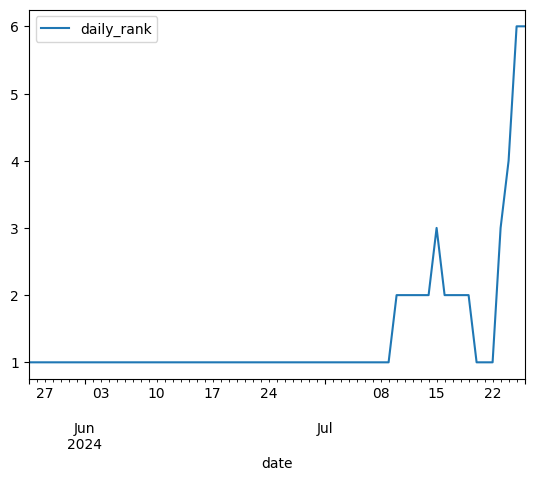

In [38]:
artista_df.plot('date', 'daily_rank')